In [27]:
# Read predictions using Pandas
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import boto3

# Set up S3 client
s3 = boto3.client(
    's3',
    aws_access_key_id='#################',
    aws_secret_access_key='/###################'
)

# Download file from S3
bucket_name = 'buket-containing-predictions-for-lambda'
file_name = 'predictions_10000_price.csv'
download_path = "./predictions_10000_price.csv"
s3.download_file(bucket_name, file_name, download_path)

# Read predictions using Pandas
predictions = pd.read_csv(download_path)

# create a list of the dummy columns
dummy_cols = ['city_name_ Barcelona', 'city_name_Bilbao', 'city_name_Madrid', 'city_name_Seville', 'city_name_Valencia']

# create a new column called 'city' by finding the column with the highest value for each row
predictions['city'] = predictions[dummy_cols].idxmax(axis=1).str.replace('city_name_', '')



C:\Users\alexm\AppData\Local\Temp\ipykernel_19084\3278827864.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


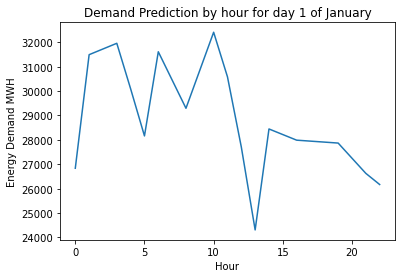

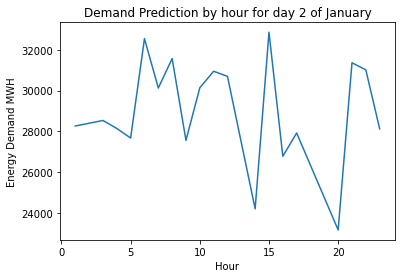

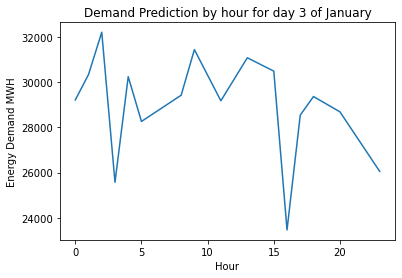

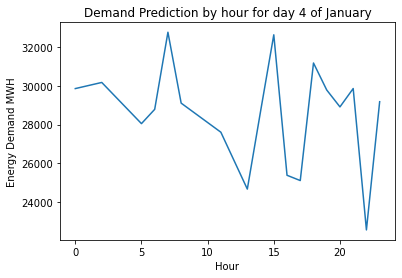

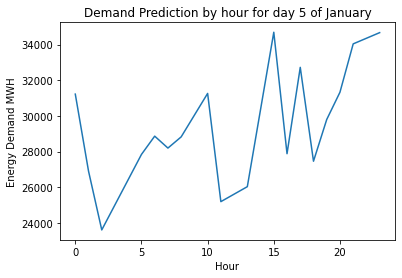

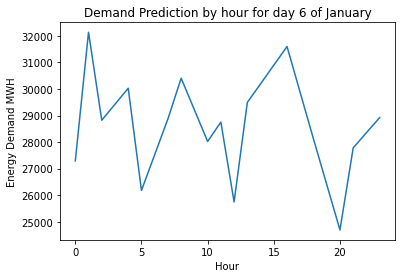

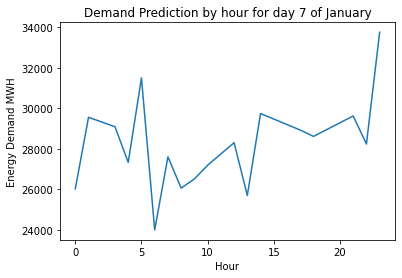

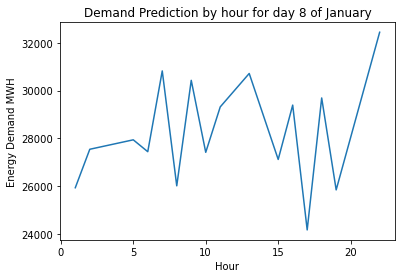

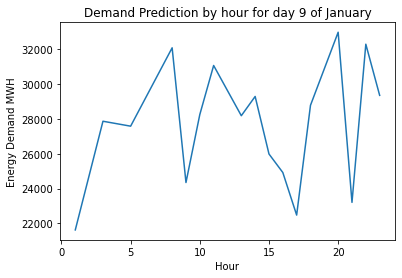

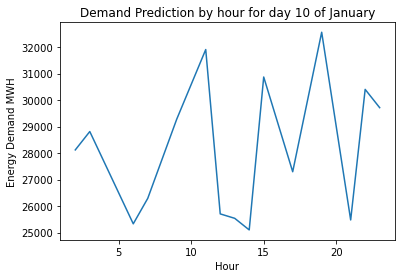

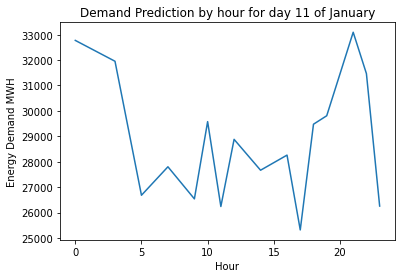

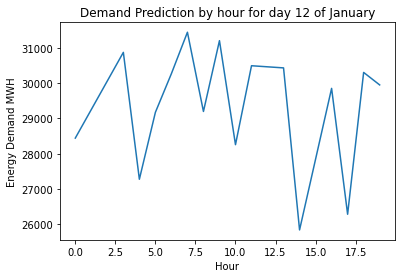

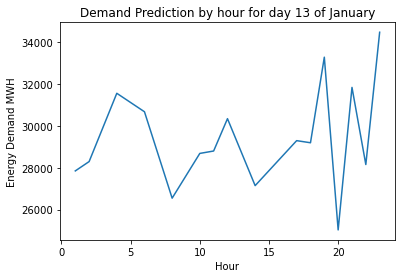

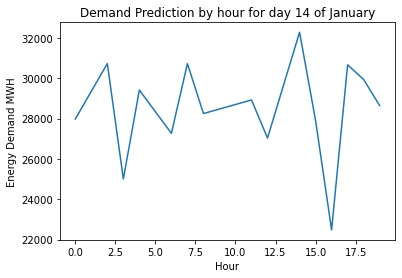

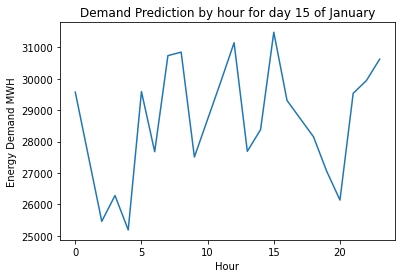

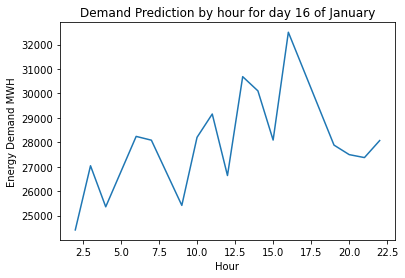

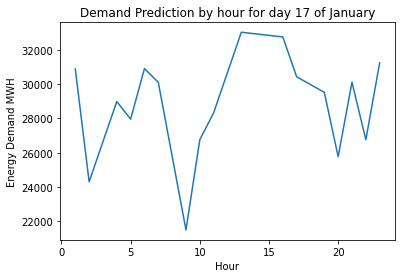

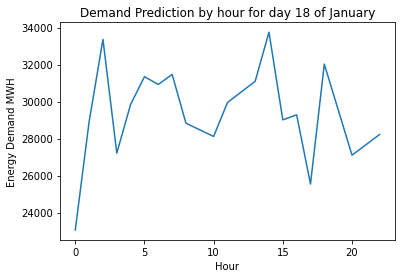

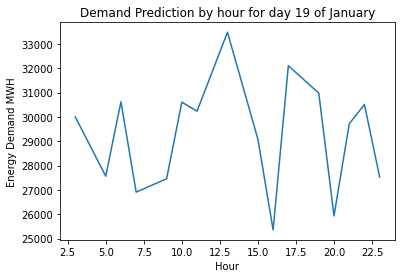

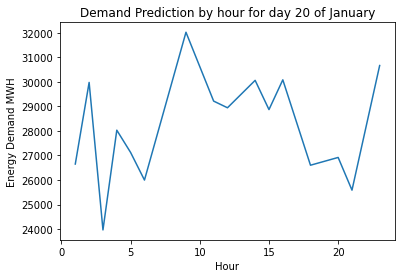

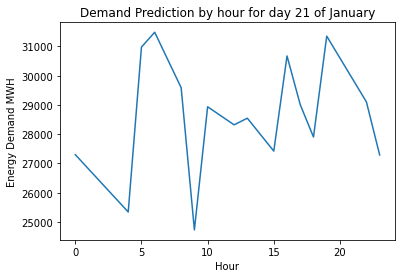

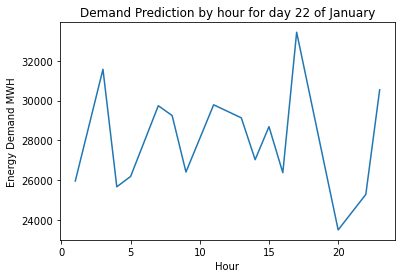

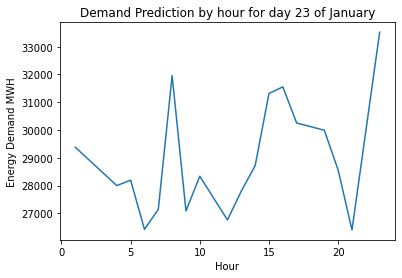

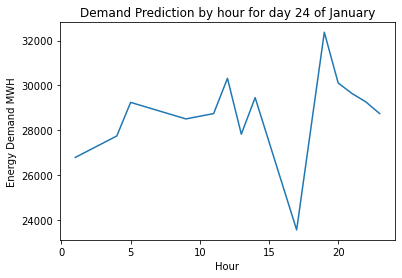

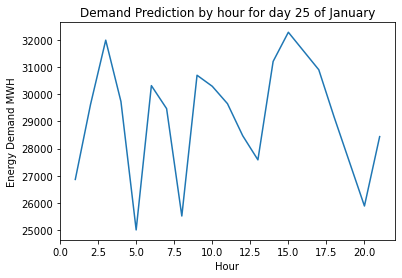

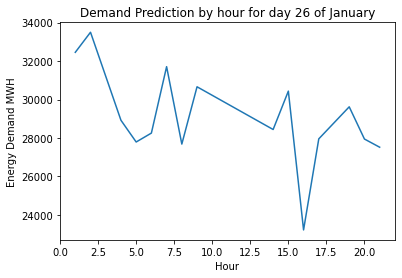

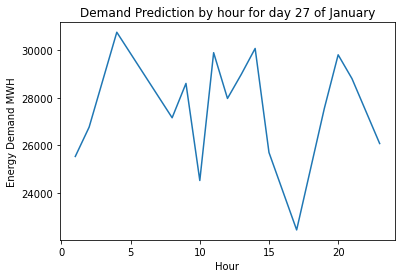

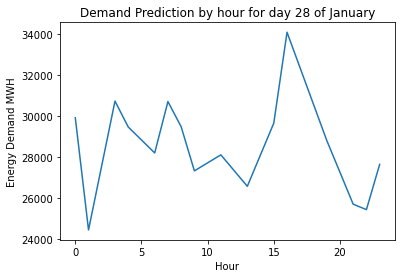

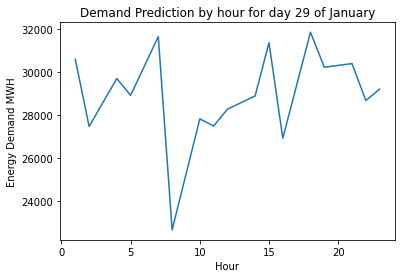

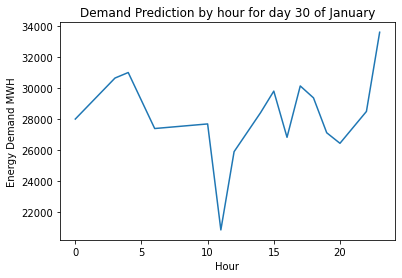

In [26]:
import calendar

# Select columns city, day, hour, and predicted_value
predictions_subset = predictions.loc[:, ['city', 'day', 'month', 'hour', 'predicted_value']]

# Create list of months and cities for selectors
months = list(range(1, 13))
cities = predictions_subset['city'].unique().tolist()

# Allow user to select a city and month
selected_city = st.selectbox('Select a city:', cities)
selected_month_num = st.selectbox('Select a month:', months)

# Convert selected month number to month name
selected_month_name = calendar.month_name[selected_month_num]

# Subset dataframe to only include rows with selected city and month
subset = predictions_subset[(predictions_subset['city'] == selected_city) & (predictions_subset['month'] == selected_month_num)][['day', 'hour', 'predicted_value']]

# Loop through each day (1-30)
for day in range(1, 31):
    # Subset dataframe to only include rows with current day
    day_subset = subset[subset['day'] == day][['hour', 'predicted_value']]
    
    # Group by hour and take the mean of each group
    grouped = day_subset.groupby('hour').mean()
    
    # Reset the index to make hour a column again
    grouped = grouped.reset_index()
    
    # Create plot
    fig, ax = plt.subplots()
    ax.plot(grouped['hour'], grouped['predicted_value'])
    ax.set_xlabel('Hour')
    ax.set_ylabel('Price/MWH')
    ax.set_title('Energy Price Prediction by hour for day {} in {}, {}'.format(day, selected_city, selected_month_name))
    
    # Render plot in Streamlit app
    st.pyplot(fig)
